## **Flowers Classification**
---

In [1]:
# importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import tarfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# define data path where the data has been extracted
data_dir = 'flower_photos'

In [3]:
# # Setting up the hyperparameters for the models in advance
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
# setting up data augmentation pipeline using random flipping and rotation of the samples to increase training diversity
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [5]:
# Preprocess input specific for VGG16 for pre-training
preproc = tf.keras.applications.vgg16.preprocess_input

In [6]:
# initializing data generators, applies preprocessing and data augmentation 
train_data = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preproc,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20
)

In [7]:
# loading images from the specified directory and splitting into training and testing data
train_gen = train_data.flow_from_directory(
    data_dir,
    subset='training',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = train_data.flow_from_directory(
    data_dir,
    subset='validation',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [8]:
# Model building
base_model = tf.keras.applications.VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), include_top=False, weights='imagenet')
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 223s 4us/step


In [10]:
# adding additional layers and regularization methods
model = models.Sequential([
    layers.InputLayer(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Use shape instead of input_shape
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

In [11]:
# compiling the model and specifying the optimizer, loss function and evaluation metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# printing the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,245,125 (58.16 MB)

 Trainable params: 530,437 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
# setting up callback to stop training and save the model with best validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [15]:
# fitting the model with training and validation data generators
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50


c:\Users\Lenovo-PC\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 1418s 15s/step - accuracy: 0.6322 - loss: 1.9523 - val_accuracy: 0.8153 - val_loss: 0.6573
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1524s 17s/step - accuracy: 0.8242 - loss: 0.6328 - val_accuracy: 0.8112 - val_loss: 0.7543
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1417s 15s/step - accuracy: 0.8595 - loss: 0.4323 - val_accuracy: 0.8591 - val_loss: 0.4649
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1472s 16s/step - accuracy: 0.8853 - loss: 0.3585 - val_accuracy: 0.8331 - val_loss: 0.5383
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1470s 16s/step - accuracy: 0.8811 - loss: 0.3226 - val_accuracy: 0.8632 - val_loss: 0.4610
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1397s 15s/step - accuracy: 0.9006 - loss: 0.2654 - val_accuracy: 0.8372 - val_loss: 0.5053
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3598s 39s/step - accuracy: 0.9083 - loss: 0.2534 - val_accuracy: 0.8769 - val_loss: 0.3781
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1221s 13s/step - accuracy: 0.9111 - loss: 0.2442 - val_accuracy: 0.849

This cell evaluates the model on the validation set and prints the validation accuracy.

In [17]:
# evaluate the model 
test_loss, test_acc = model.evaluate(val_gen)
print("Validation accuracy:", test_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 270s 12s/step - accuracy: 0.8584 - loss: 0.3989
Validation accuracy: 0.8727770447731018


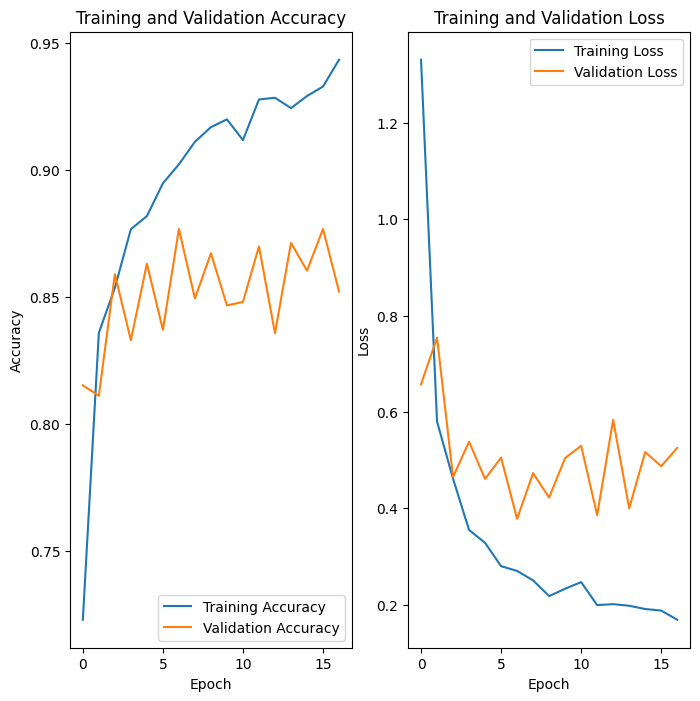

In [18]:
# Plotting accuracy and loss line graphs to track the progress of the model
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Save the entire model as a single Keras file
model.save('VGG16_trained_model.keras', save_format='keras')
